In [8]:
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

## 버전확인

In [9]:
print(cv2.__version__)

4.5.5


In [10]:
# 이번 강의에 쓰일 source directory를 절대경로 변수로 만들어두자.
base_dir = 'C:/Users/Jay/Desktop/git/TIL/data_src/opencv/lecture/ch01/'

## 기초 예제 : 고양이 이미지 불러오기
- BMP 파일을 불러와서 출력하는 소스 코드

In [11]:
# image read
img = cv2.imread(base_dir+'cat.bmp')

In [12]:
# 예외처리
# 혹시 이미지를 못 불러오는 경우도 있을 수 있으니 예외처리를 해주는게 좋다.
if img is None :
    print('Image load failed')
    sys.exit()
    
# namedWindow : 이미지 윈도우 창을 만들어준다.
cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.waitKey() # 이거까지 입력해야 윈도우 창이 뜬다. 다른 행위를 하기전까지 윈도우창이 유지되도록 해준다.

cv2.destroyAllWindows()

## OpenCV 기초 함수
- https://docs.opencv.org/master/  참고

### 1. 영상 파일 불러오기 cv2.imread

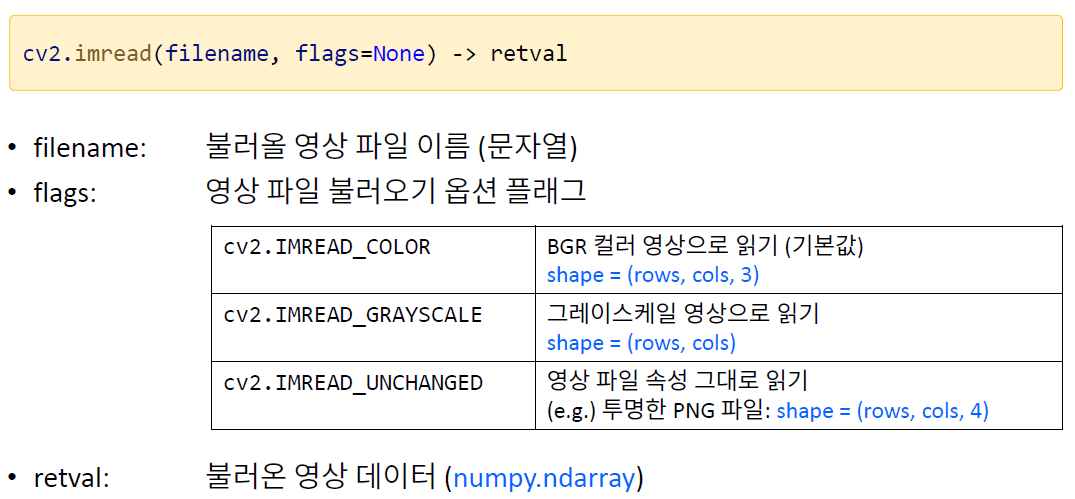

In [13]:
img = cv2.imread(base_dir+'cat.bmp', cv2.IMREAD_GRAYSCALE) # 흑백 사진으로 불러온다.
cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 2. 영상 파일 저장하기 cv2.imwrite

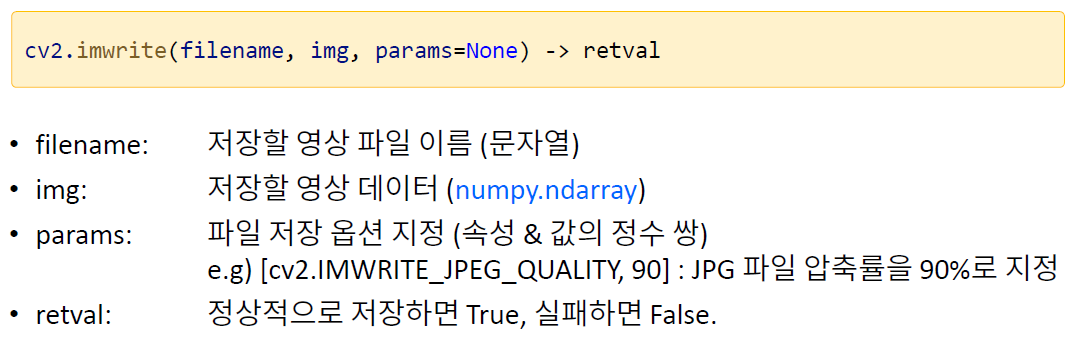

In [7]:
cv2.imwrite(base_dir+'cat_grayscale.png', img)

True

### 3. 새 창 띄우기 cv2.nameWindow
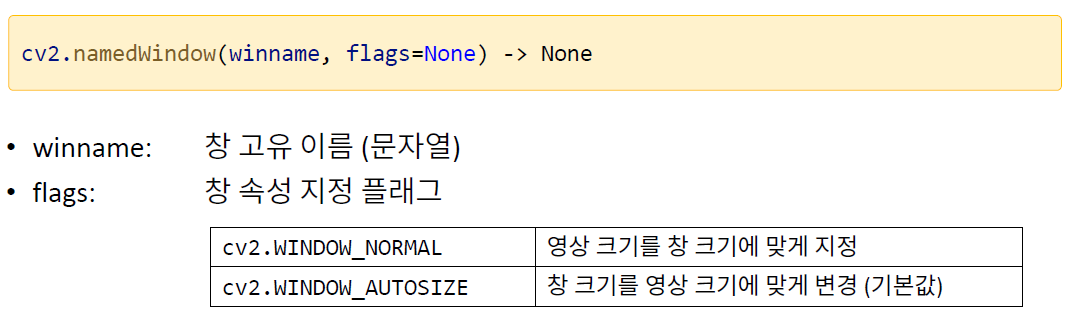

### 4. 창 닫기 cv2.destroyWindow
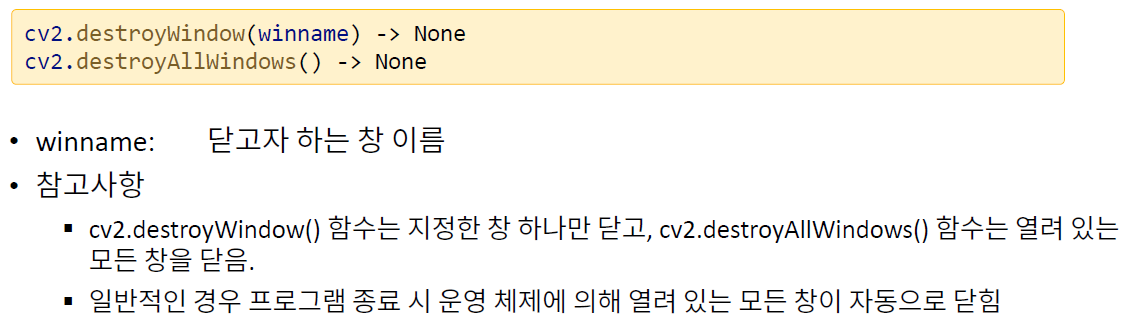

### 5. 창 위치 이동 cv2.moveWindow
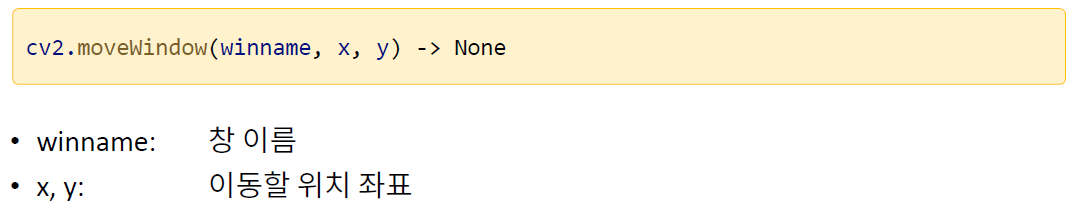

### 6. 창 크기 변경 cv2.resizeWindow
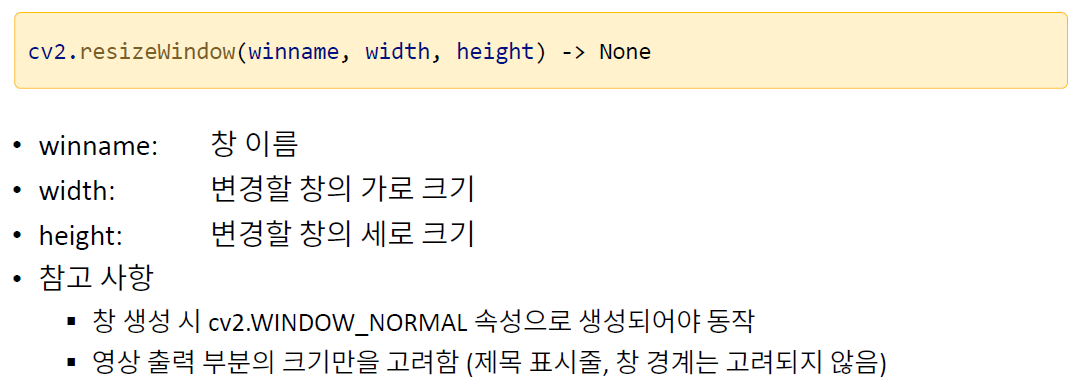

### 7. 영상 출력하기  cv2.imshow
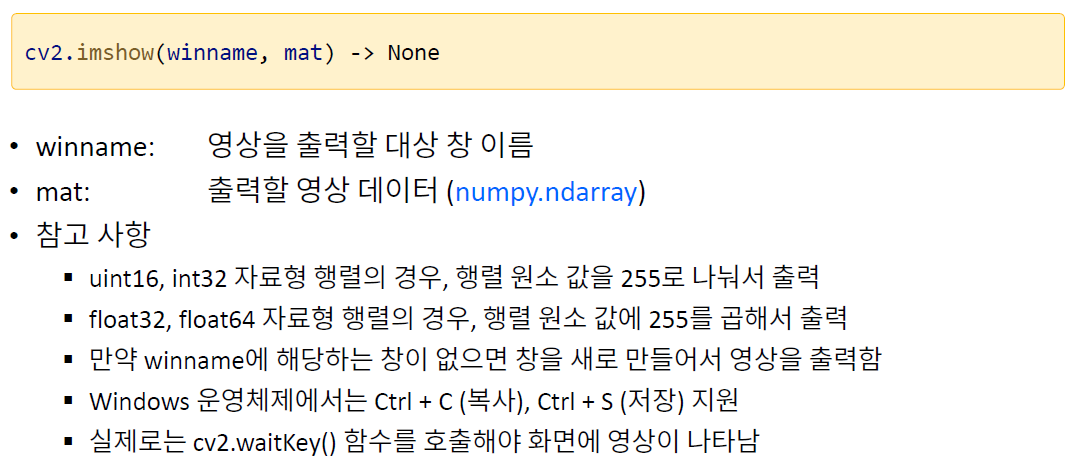

### 8. 키보드 입력 대기 cv2.waitKey
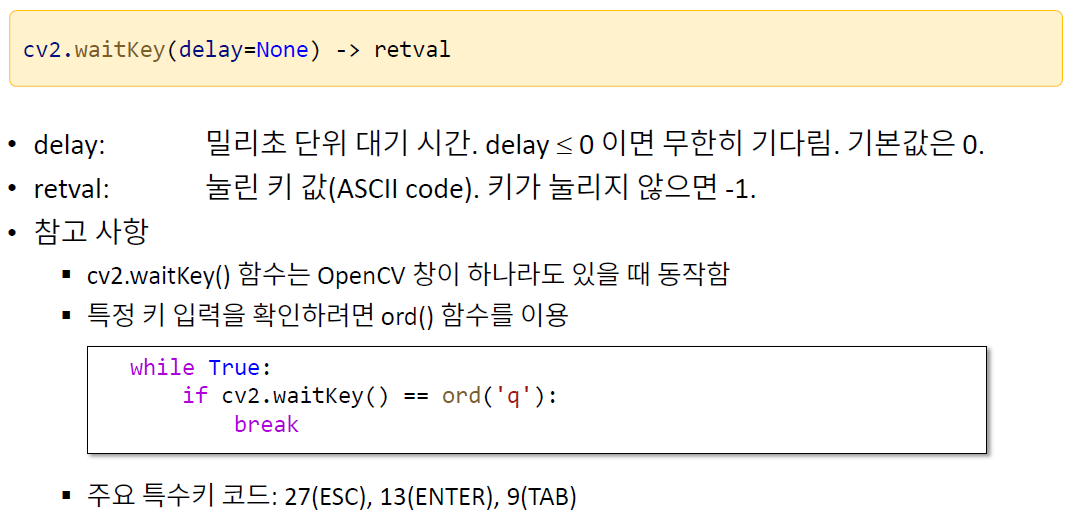

### (추가) 전체 화면 영상 출력
    
    cv2.nameWindow('image', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREE) 

## matplotlib을 이용한 cv영상 출력

- 컬러 영상 출력
    - 컬러 영상의 색상 정보가 RGB 순서여야 함.
    - cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서이기 때문에 RGB 순서로 바꿔줘야 한다.
        - cv2.cvtColor() 이용


- 그레이스케일 영상 출력
    - plt.imshow() 함수에서 cmap을 cmap='gray'로 지정

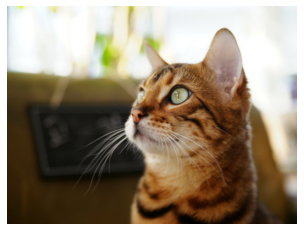

In [14]:
# 컬러 영상 출력
imgBGR = cv2.imread(base_dir+'cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) # BGR을 RGB로 변경하는 함수와 옵션
# plt.figure(figsize=(10,10))
plt.axis('off') # 가로세로 눈금 삭제
plt.imshow(imgRGB)
plt.show()

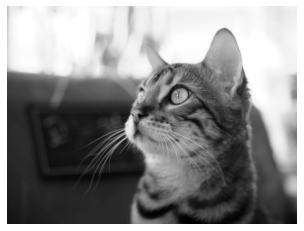

In [8]:
# 그레이스케일 영상 출력
imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

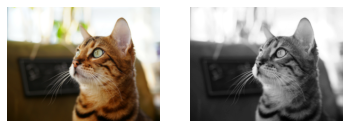

In [9]:
# 두 개의 영상을 함께 출력
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(imgRGB)

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')

plt.show()

## 슬라이스쇼 만들어보기
- images 폴더의 이미지들로 슬라이드쇼를 만들어보자

**특정 폴더에 있는 이미지 파일 목록 일기**
1. os 모듈
    - ls.listdir(directory)
    - img_file = [file for file in file_list if file.endswith('.jpg')]
    


2. glob 모듈 (와일드카드 사용)
    - import glob
    - img_files = glob.glob('.\\\\images\\\\\*.jpg)

In [10]:
import glob
import os

In [11]:
file_list = os.listdir('./images/')
img_file = [file for file in file_list if file.endswith('.jpg')]

In [12]:
img_file

['autumn_forest_park_128379_1920x1080.jpg',
 'boat_mountains_lake_135258_1920x1080.jpg',
 'forest_fog_trees_128751_1920x1080.jpg',
 'pier_dock_sea_dusk_shore_118549_1920x1080.jpg',
 'road_marking_evening_clouds_horizon_120298_1920x1080.jpg']

In [13]:
img_files = glob.glob('.\\images\\*.jpg')

In [14]:
for f in img_files :
    print(f)

.\images\autumn_forest_park_128379_1920x1080.jpg
.\images\boat_mountains_lake_135258_1920x1080.jpg
.\images\forest_fog_trees_128751_1920x1080.jpg
.\images\pier_dock_sea_dusk_shore_118549_1920x1080.jpg
.\images\road_marking_evening_clouds_horizon_120298_1920x1080.jpg


In [18]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cnt = len(img_files)
idx = 0
while True :
    img = cv2.imread(img_files[idx])
    
    cv2.imshow('image', img)
    
    if img is None :
        print('Image load failed')
        break
    
    if cv2.waitKey(1000) == 27 : # >= 0 : 키보드에 아무키나 누르면 꺼지도록 하는 것
        break
        
    idx += 1
    if idx >= cnt :
        idx = 0
        
cv2.destroyAllWindows()